# **Predicting Customer Churn**

---
Churn is when a customer stops doing business or ends a relationship with a company. This project will make predictions using machine learning.


**Exploratory Data Analysis**


---


Begin exploring the Telco Churn Dataset using pandas to compute summary statistics and seaborn to create attractive visualizations.

In [1]:
import pandas as pd
telco = pd.read_csv("Telco Churn.csv")

telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [2]:
# Explore customer churn
telco['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Based on the results we see that there are far more Non-Churners than Churners in dataset.

In [3]:
# Summary statistics for both classes
# Group telco by 'Churn' and compute the mean
telco.groupby(['Churn'])['CustServ_Calls','Vmail_Message'].mean()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.449825,8.604561
yes,2.229814,5.115942


In [4]:
# Group telco by 'Churn' and compute the standard deviation
telco.groupby(['Churn'])['CustServ_Calls','Vmail_Message'].std()

,CustServ_Calls,Vmail_Message
Churn,,
no,1.163883,13.913125
yes,1.853275,11.860138


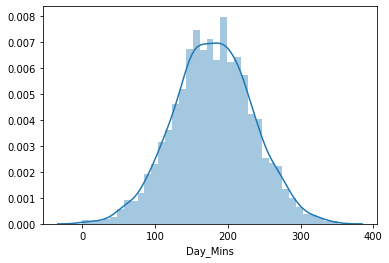

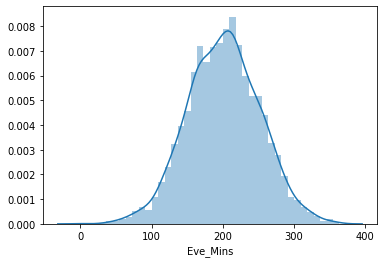

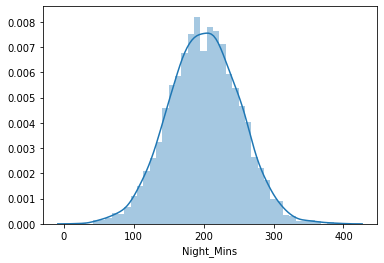

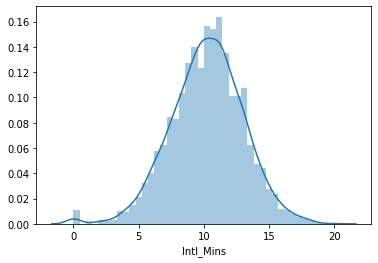

<Figure size 432x288 with 0 Axes>

In [5]:
# Visualize the distribution of 'Day_Mins', 'Eve_Mins', 'Night_Mins', and 'Intl_Mins'
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(telco['Day_Mins'])
plt.show()
plt.clf()

sns.distplot(telco['Eve_Mins'])
plt.show()
plt.clf()

sns.distplot(telco['Night_Mins'])
plt.show()
plt.clf()

sns.distplot(telco['Intl_Mins'])
plt.show()
plt.clf()

All of these features appear to be well approximated by the normal distribution.

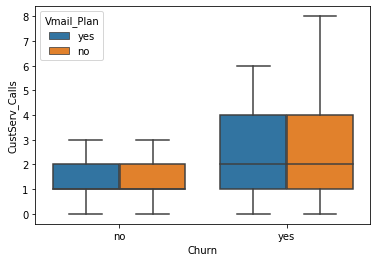

In [6]:
# Visualize a difference in the number of customer service calls left by churners
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = 'Vmail_Plan')

plt.show()

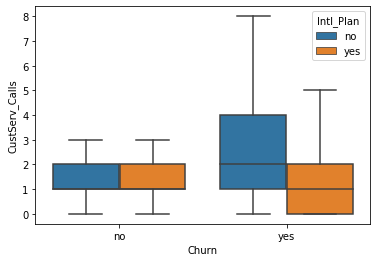

In [7]:
# Do customers who have international plans make more customer service calls?
sns.boxplot(x = 'Churn', y = 'CustServ_Calls', data = telco, sym = "", hue = 'Intl_Plan')

plt.show()

There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

**Preprocessing for Churn Modeling**


---


After explored data, it's time to preprocess it and get it ready for machine learning. 

In [8]:
# Identifying features to convert
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

`Convert Churn`, `Vmail_Plan`, and `Intl_Plan`, which are binary features, into 0s and 1s

In [9]:
from sklearn.preprocessing import LabelEncoder 

# Replace 'no' with 0 and 'yes' with 1 in 'Vmail_Plan' and 'Churn'
telco['Churn'] = LabelEncoder().fit_transform(telco['Churn'])
telco['Intl_Plan'] = LabelEncoder().fit_transform(telco['Intl_Plan'])
telco['Vmail_Plan'] = LabelEncoder().fit_transform(telco['Vmail_Plan'])

print(telco['Churn'].head())
print(telco['Intl_Plan'].head())
print(telco['Vmail_Plan'].head())

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64
0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64
0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64


In [10]:
# Drop the unnecessary features : Some features such as 'State', 'Area_Code', and 'Phone' are not useful when it comes to predicting customer churn
telco = telco.drop(telco[['State', 'Area_Code','Phone']], axis=1)

print(telco.columns)

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge'],
      dtype='object')


**Churn Prediction**


---


With data preprocessed and ready for machine learning, it's time to predict churn. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = telco.drop('Churn', axis=1)
y = telco['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# Evaluate Model Performance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_pred = clf.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
accuracy_score = clf.score(X_test, y_test)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

print("Confusion matrix:\n {}".format(confusion_matrix.round(2)))
print("Accuracy score: {}".format(accuracy_score.round(2)))
print("Precision score: {}".format(precision_score.round(2)))
print("Recall score: {}".format(recall_score.round(2)))
print("F1 score: {}".format(f1_score.round(2)))

Confusion matrix:
 [[570   5]
 [ 21  71]]
Accuracy score: 0.96
Precision score: 0.93
Recall score: 0.77
F1 score: 0.85


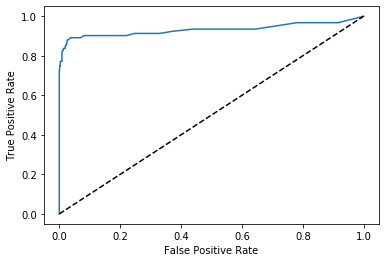

Area under the curve: 0.93


In [13]:
# Create an ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt 

y_pred_prob = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Area under the curve
print("Area under the curve: {}".format(roc_auc_score(y_test, y_pred_prob).round(2)))

**Model Tuning**


---

Improve the performance of models using hyperparameter tuning and gain a better understanding of the drivers of customer churn.



In [14]:
from sklearn.model_selection import GridSearchCV 

param_grid = {"max_depth": [3, 4, 5, 6],
              "max_features": [2, 4, 6, 8, 10]}

grid_search = GridSearchCV(clf, param_grid, cv=5)

grid_search.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='w

In [15]:
print("RandomForestClassifier Parameter: {}".format(grid_search.best_params_))
print("RandomForestClassifier Score: {}".format(grid_search.best_score_.round(2)))

RandomForestClassifier Parameter: {'max_depth': 6, 'max_features': 6}
RandomForestClassifier Score: 0.95


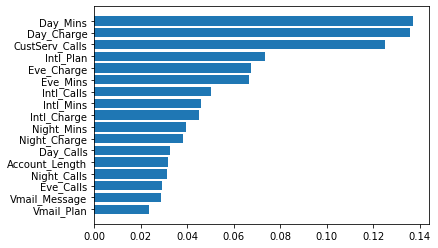

In [16]:
# Visualizing feature importances
import numpy as np

clf.fit(X_train, y_train)

importances = clf.feature_importances_

sorted_index = np.argsort(importances)

labels = X.columns[sorted_index]

plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

In [17]:
# Predict the label of new_customer
New_customer = pd.read_csv("New Customer.csv")

y_new_customer = grid_search.predict(New_customer)

if y_new_customer == 1 :
  print("A new customer will churn.")
else : 
  print("A new customer will not churn.")

A new customer will not churn.
